In [5]:
import matplotlib.pyplot as plt
import importlib
import bitmap_editor
importlib.reload(bitmap_editor)
import numpy as np

height = 10
width = 10
bitmap_matrix = np.zeros(shape=(height,width))
bitmapEditor = bitmap_editor.BitmapEditor(bitmap_matrix)

Canvas(height=200, width=200)

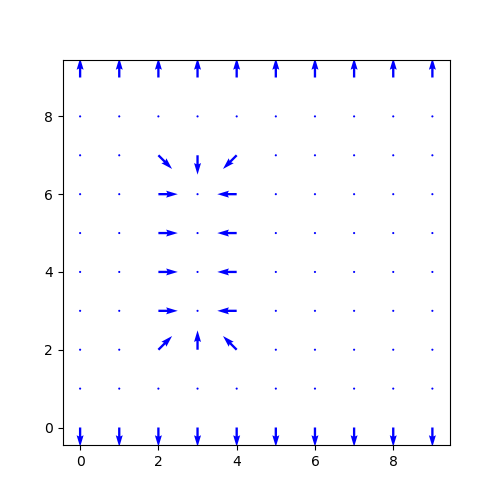

In [6]:
import navier_stokes
importlib.reload(navier_stokes)

grid = np.flip(np.copy(bitmap_matrix), 0)

######### Actual simulation code

fluid_cells = navier_stokes.fluid_cells(grid)
fluid_cell_index = navier_stokes.fluid_cell_index(fluid_cells, grid.shape)

navier_stokes.simplify_normals(fluid_cells)


A = navier_stokes.projection_A(fluid_cells, fluid_cell_index, grid.shape[1], grid.shape[0])
b = navier_stokes.projection_b(fluid_cells)

################
X, Y = np.meshgrid(np.arange(width), np.arange(height))
NormalsU = np.zeros(shape=(height, width))
NormalsV = np.zeros(shape=(height, width))




for fluid_cell in fluid_cells:
    normal = np.array([0, 0])
    if fluid_cell.boundary_normal is not None:
        normal = fluid_cell.boundary_normal
    NormalsU[fluid_cell.grid_index] = normal[0]
    NormalsV[fluid_cell.grid_index] = normal[1]


fig, ax = plt.subplots(figsize=(5, 5))
ax.quiver(X, Y, NormalsU, NormalsV, color="b", scale=20)
plt.show()

In [43]:

with np.printoptions(threshold=np.inf):
    print(A)

[[ 1.          0.          0.          0.          0.          0.
   0.         -1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          1.          0.          0.          0.          0.
   0.          0.         -1.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
 

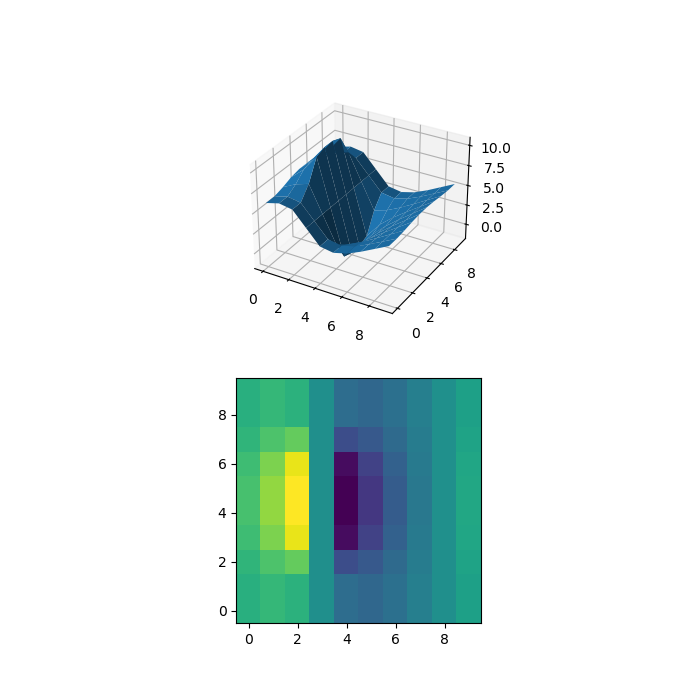

In [7]:
%matplotlib widget
import pyamg

ml = pyamg.ruge_stuben_solver(A)  # Build the multigrid hierarchy
x = ml.solve(b, tol=1e-8)
# x = np.linalg.solve(A,b)

mesh = np.zeros(shape=(height,width))

avg = np.average(x)

for j in range(0,height):
    for i in range(0,width):
        if grid[j][i]:
            mesh[j][i] = avg
            continue
        index = fluid_cell_index[j][i]
        mesh[j][i] = x[index]

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(211, projection='3d')
ax2 = fig.add_subplot(212)
ax2.imshow(mesh, interpolation='none', origin='lower')
# plt.imshow(mesh, interpolation='none', origin='lower')
ax.plot_surface(X,Y,mesh) 
plt.show()

In [63]:
((5.29 - 2.13)/2 + (3.21 - 2.36)/2)/np.sqrt(2)

1.4177490962790276

In [64]:
2/np.sqrt(2)

1.414213562373095